## Import stuff and set options

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

from raw_data_types import items_types
from raw_data_types import prices_types
from raw_data_types import train_types

%matplotlib inline  
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_rows', 20)
plot_color = colors.hex2color('#86b92e')

# Explore original data

sets downloaded from dmc without any preprocessing

## Read files

In [2]:
PATH = "C:\\DMC_2018\\raw_data\\"

items = pd.read_csv(PATH + "items.csv", sep='|', dtype=items_types)
prices = pd.read_csv(PATH + "prices.csv", sep='|', dtype=prices_types)
train = pd.read_csv(PATH + "train.csv", sep='|', dtype=train_types)


## Explore Items.csv

In [3]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12824 entries, 0 to 12823
Data columns (total 10 columns):
pid             12824 non-null int64
size            12815 non-null object
color           12824 non-null object
brand           12824 non-null object
rrp             12824 non-null float64
mainCategory    12824 non-null int64
category        12824 non-null int64
subCategory     11690 non-null float64
stock           12824 non-null int64
releaseDate     12824 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 1002.0+ KB


In [4]:
items.head(15)

,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
0,10000,XL ( 158-170 ),gruen,Nike,25.330,1,7,25.000,1,2017-10-01
1,10001,L,schwarz,Jako,38.030,1,7,16.000,1,2017-10-01
2,10003,3 (35-38 ),weiss,Jako,12.630,1,7,13.000,1,2017-10-01
3,10003,4 ( 39-42 ),weiss,Jako,12.630,1,7,13.000,1,2017-10-01
4,10003,5 ( 43-46 ),weiss,Jako,12.630,1,7,13.000,1,2017-10-01
5,10006,XL,blau,Under Armour,57.080,15,24,nan,1,2017-10-01
6,10008,XL,blau,PUMA,25.330,1,7,8.000,12,2017-10-01
7,10013,L,schwarz,adidas,69.780,1,7,16.000,1,2017-10-27
8,10013,M,schwarz,adidas,69.780,1,7,16.000,1,2017-10-27
9,10013,S,schwarz,adidas,69.780,1,7,16.000,1,2017-10-27


In [5]:
items.isnull().sum()

pid                0
size               9
color              0
brand              0
rrp                0
mainCategory       0
category           0
subCategory     1134
stock              0
releaseDate        0
dtype: int64

Zbadajmy jak wyglądają nulle w rozmiarach

In [6]:
items[items['size'].isnull()]

,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
343,10400,NaN,schwarz,adidas,12.630,1,2,27.000,1,2017-10-01
540,10609,NaN,schwarz,Uhlsport,5.010,1,2,27.000,8,2017-10-01
3537,13515,NaN,schwarz,Uhlsport,2.470,1,2,27.000,1,2017-10-01
6050,15996,NaN,schwarz,Uhlsport,6.280,1,2,27.000,3,2017-10-01
8795,18754,NaN,schwarz,Uhlsport,2.470,1,2,27.000,2,2017-10-01
9495,19517,NaN,silber,adidas,15.170,1,2,27.000,1,2017-10-01
9894,19891,NaN,schwarz,Uhlsport,2.470,1,2,27.000,3,2017-10-01
10259,20248,NaN,weiss,Uhlsport,5.010,1,2,27.000,8,2017-10-01
10992,21001,NaN,silber,Uhlsport,8.820,1,2,27.000,1,2017-10-01


In [7]:
items[items['pid'].isin([10400,10609,13515,15996,18754,19517,19891,20248,21001])]

,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
343,10400,NaN,schwarz,adidas,12.630,1,2,27.000,1,2017-10-01
540,10609,NaN,schwarz,Uhlsport,5.010,1,2,27.000,8,2017-10-01
3537,13515,NaN,schwarz,Uhlsport,2.470,1,2,27.000,1,2017-10-01
6050,15996,NaN,schwarz,Uhlsport,6.280,1,2,27.000,3,2017-10-01
8795,18754,NaN,schwarz,Uhlsport,2.470,1,2,27.000,2,2017-10-01
9495,19517,NaN,silber,adidas,15.170,1,2,27.000,1,2017-10-01
9894,19891,NaN,schwarz,Uhlsport,2.470,1,2,27.000,3,2017-10-01
10259,20248,NaN,weiss,Uhlsport,5.010,1,2,27.000,8,2017-10-01
10992,21001,NaN,silber,Uhlsport,8.820,1,2,27.000,1,2017-10-01


Każdy z NaN ma tylko jeden pid, a te pid posiadają tylko size NaN, więc można uznać, że to np. one size.

In [8]:
items['size'].fillna(value='unisize', inplace=True)


Pandas nie umie trzymać NaNów w kolumnie integer i dlatego wczytał subCategory jako floata. Zastąpmy Nany w tej kolumnie wartością 0 i zamieńmy na int64. 

In [9]:
items['subCategory'].fillna(0, inplace=True)
items['subCategory'] = items['subCategory'].astype('int64', inplace=True)

In [10]:
items[items['subCategory'] == 0].head(15)


,pid,size,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
5,10006,XL,blau,Under Armour,57.080,15,24,0,1,2017-10-01
12,10017,L,blau,Under Armour,69.780,15,33,0,1,2017-10-01
119,10153,L,gelb,Uhlsport,44.380,15,33,0,1,2017-10-01
133,10167,M,weiss,Jako,25.330,15,16,0,1,2017-10-01
134,10167,S,weiss,Jako,25.330,15,16,0,1,2017-10-01
196,10228,L,schwarz,Under Armour,31.680,15,16,0,7,2017-10-01
197,10228,M,schwarz,Under Armour,31.680,15,16,0,3,2017-10-01
198,10228,XL,schwarz,Under Armour,31.680,15,16,0,1,2017-10-01
208,10244,164/176,schwarz,Jako,38.030,15,33,0,1,2017-11-22
242,10290,L,schwarz,adidas,44.380,15,16,0,2,2017-11-09


In [11]:
items.loc[:, ('rrp', 'stock')].describe()


,rrp,stock
count,12824.000,12824.000
mean,98.526,3.533
std,90.788,11.034
min,2.470,1.000
25%,38.030,1.000
50%,69.780,1.000
75%,114.230,2.000
max,463.480,459.000


###  size

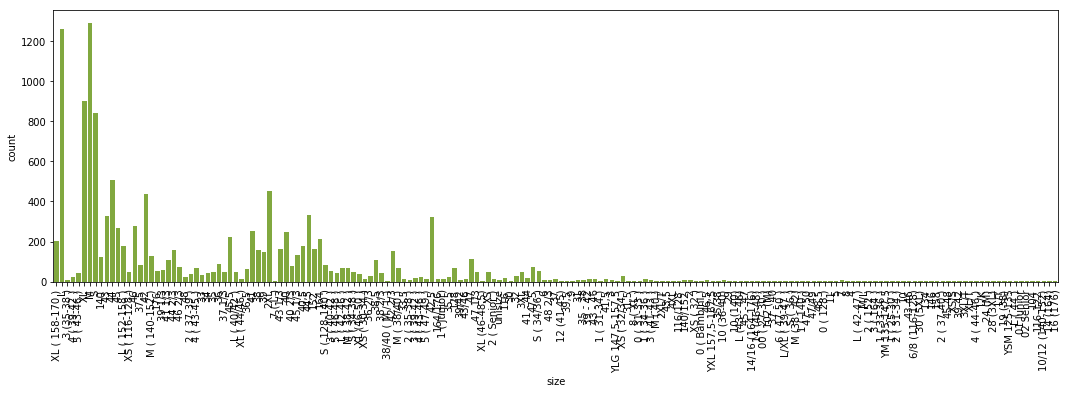

In [13]:
fig, ax = plt.subplots(figsize=(18, 5))
s = sns.countplot(x='size', data=items, ax=ax, color=plot_color)
l = s.set_xticklabels(labels=s.get_xticklabels(), rotation=90)  # had to be assigned to a variable to suppres output


### color, brand

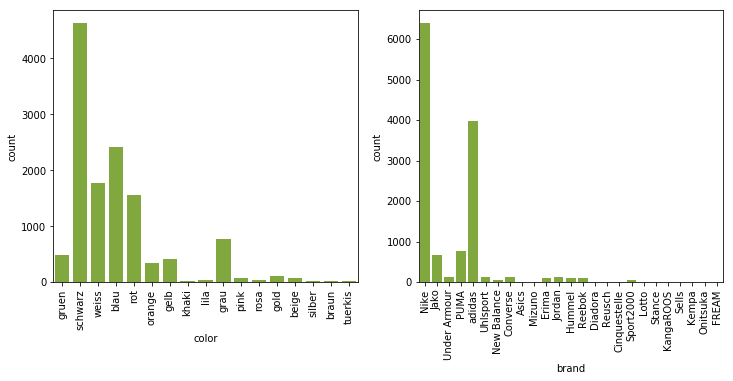

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
s1 = sns.countplot(x='color', data=items, ax=ax[0], color=plot_color)
s2 = sns.countplot(x='brand', data=items, ax=ax[1], color=plot_color)
l1 = s1.set_xticklabels(labels=s1.get_xticklabels(), rotation=90)  # had to be assigned to a variable to suppres output
l2 = s2.set_xticklabels(labels=s2.get_xticklabels(), rotation=90)  # had to be assigned to a variable to suppres output


### mainCategory, category, subCategory

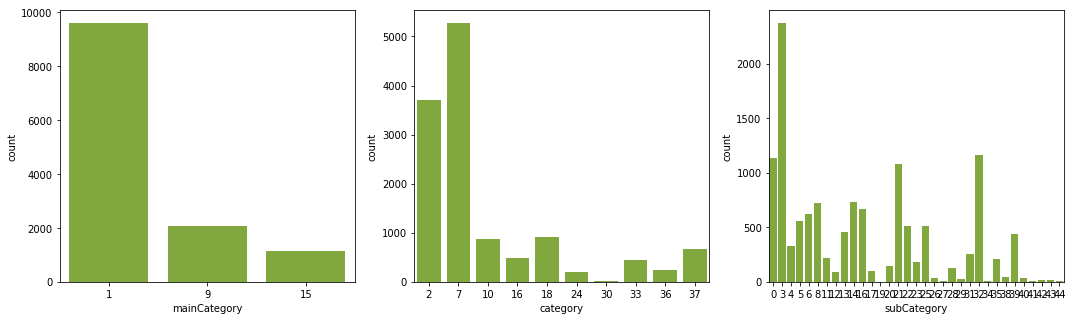

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
s1 = sns.countplot(x='mainCategory', data=items, ax=ax[0], color=plot_color)
s2 = sns.countplot(x='category', data=items, ax=ax[1], color=plot_color)
s3 = sns.countplot(x='subCategory', data=items, ax=ax[2], color=plot_color)


### rrp (recomended retail? price)

C:\python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


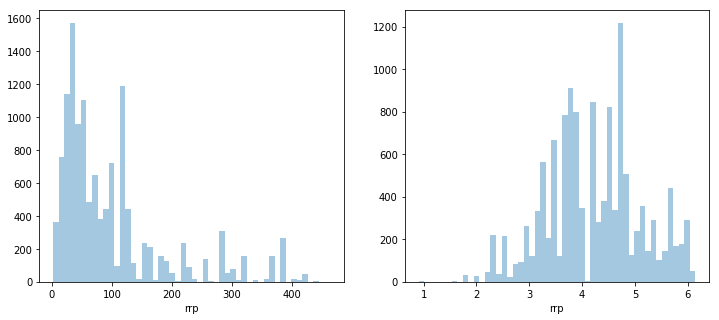

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
s1 = sns.distplot(a=items.loc[:, 'rrp'], kde=False, ax=ax[0])
s2 = sns.distplot(a=np.log(items.loc[:, 'rrp']), kde=False, ax=ax[1])


### stock

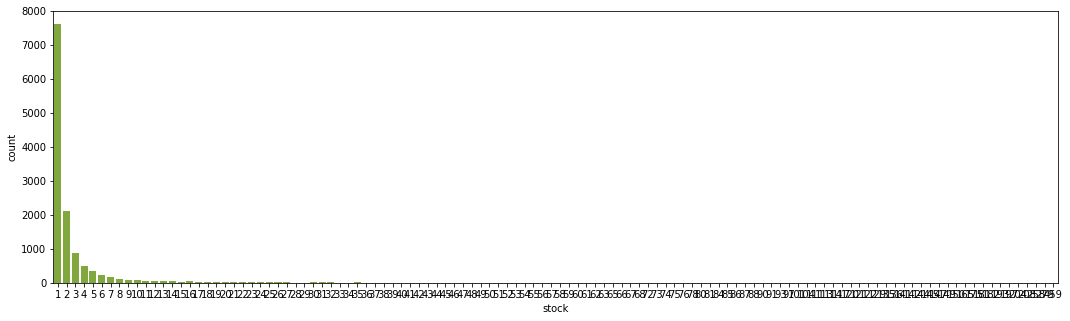

In [18]:
fig, ax = plt.subplots(figsize=(18, 5))
s1 = sns.countplot(x='stock', data=items, ax=ax, color=plot_color)


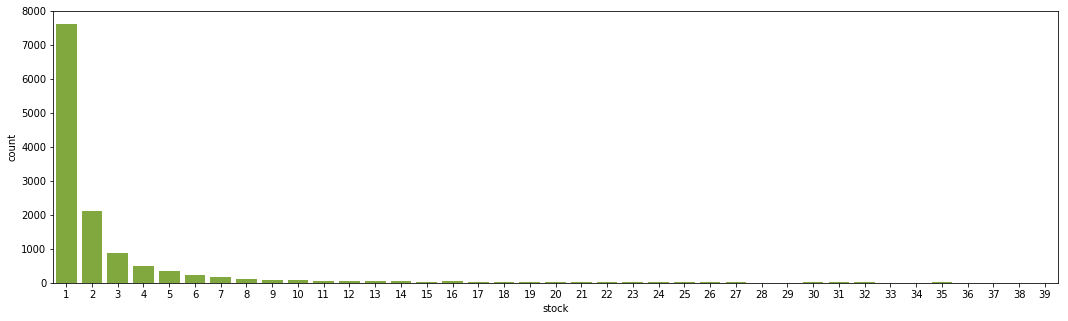

In [19]:
fig, ax = plt.subplots(figsize=(18, 5))
s1 = sns.countplot(x='stock', data=items[items.stock < 40], ax=ax, color=plot_color)


## Explore prices.csv


In [20]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12824 entries, 0 to 12823
Columns: 153 entries, pid to 2018-02-28
dtypes: float64(151), int64(1), object(1)
memory usage: 15.0+ MB


In [21]:
prices.head(15)

,pid,size,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,...,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28
0,19671,39 1/3,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
1,19671,40,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
2,19671,41 1/3,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
3,19671,42,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
4,19671,42 2/3,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
5,19671,43 1/3,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
6,19671,44,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
7,19671,44 2/3,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
8,19671,45 1/3,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310
9,19671,46 2/3,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,...,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310,133.310


In [22]:
prices.isnull().sum()

pid              0
size             9
2017-10-01    1932
2017-10-02    1932
2017-10-03    1932
2017-10-04    1932
2017-10-05    1928
2017-10-06    1928
2017-10-07    1928
2017-10-08    1928
              ... 
2018-02-19       0
2018-02-20       0
2018-02-21       0
2018-02-22       0
2018-02-23       0
2018-02-24       0
2018-02-25       0
2018-02-26       0
2018-02-27       0
2018-02-28       0
Length: 153, dtype: int64

kolumny od 118 do końca nie mają nulli

Zobaczymy jak rozkładają się ceny w 3 losowych kolumnach bez nulli

C:\python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


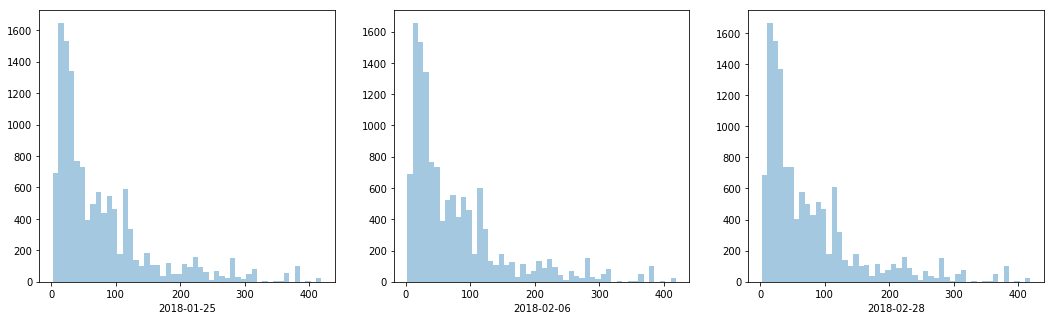

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
s1 = sns.distplot(a=prices.iloc[:, 118], kde=False, ax=ax[0])
s2 = sns.distplot(a=prices.iloc[:, 130], kde=False, ax=ax[1])
s3 = sns.distplot(a=prices.iloc[:, 152], kde=False, ax=ax[2])


A teraz zobaczymy  jak zmieniają się ceny poszczególnych produktów w czasie 

C:\python\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


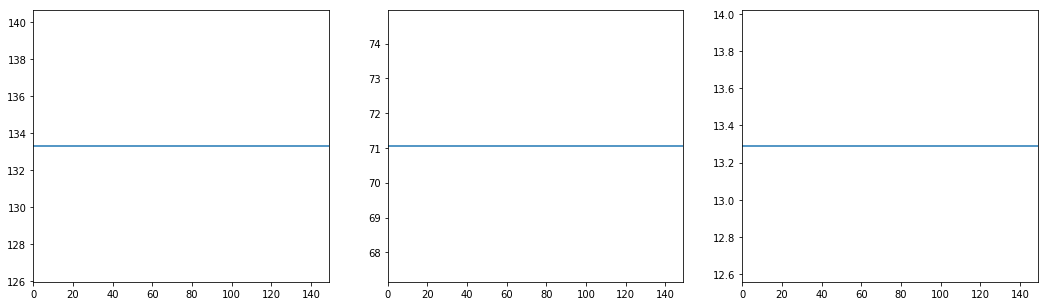

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
s1 = sns.tsplot(data=prices.iloc[0, 3:], ax=ax[0])
s2 = sns.tsplot(data=prices.iloc[100, 3:], ax=ax[1])
s3 = sns.tsplot(data=prices.iloc[200, 3:], ax=ax[2])


Znajdźmy wszystkie produkty dla których zmienia się cena 

In [28]:
prices[prices.iloc[:, 2:].std(axis=1) > 0.0000001]


,pid,size,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,...,2018-02-19,2018-02-20,2018-02-21,2018-02-22,2018-02-23,2018-02-24,2018-02-25,2018-02-26,2018-02-27,2018-02-28
4840,16484,41,nan,nan,nan,nan,nan,nan,nan,nan,...,54.620,54.620,54.620,54.620,54.620,54.620,54.620,54.620,54.620,54.620
6159,19466,46,nan,nan,nan,nan,nan,nan,nan,nan,...,77.660,77.660,77.660,77.660,77.660,77.660,77.660,77.660,77.660,77.660
6956,18893,4 ( 44-46 ),nan,nan,nan,nan,nan,nan,nan,nan,...,10.360,10.360,10.360,10.360,10.360,10.360,10.360,10.360,10.360,10.360
7347,22273,M,nan,nan,nan,nan,nan,nan,nan,nan,...,37.460,37.460,37.460,37.460,37.460,37.460,37.460,37.460,37.460,37.460
7725,12340,S,nan,nan,nan,nan,49.950,49.950,49.950,49.950,...,44.100,43.080,42.060,42.060,42.060,42.060,42.060,42.060,42.060,42.060
7726,12340,M,nan,nan,nan,nan,49.950,49.950,49.950,49.950,...,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040
7727,12340,L,nan,nan,nan,nan,49.950,49.950,49.950,49.950,...,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040,41.040
7728,12340,XL,nan,nan,nan,nan,49.950,49.950,49.950,49.950,...,42.060,42.060,42.060,41.040,41.040,41.040,41.040,41.040,41.040,41.040
8883,17420,M,nan,nan,nan,nan,nan,nan,nan,nan,...,32.050,31.030,30.010,29.220,29.220,29.220,29.220,29.220,29.220,29.220
10435,10146,M,nan,nan,nan,nan,nan,nan,nan,nan,...,66.160,66.160,66.160,66.160,66.160,66.160,66.160,66.160,66.160,66.160


## Explore train.csv

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135117 entries, 0 to 135116
Data columns (total 4 columns):
date     135117 non-null object
pid      135117 non-null int64
size     134941 non-null object
units    135117 non-null int64
dtypes: int64(2), object(2)
memory usage: 4.1+ MB


In [30]:
train.head(10)

,date,pid,size,units
0,2017-10-01,14393,2 ( 37-39 ),1
1,2017-10-01,10069,36,2
2,2017-10-01,10069,35,1
3,2017-10-01,16221,L,1
4,2017-10-01,11317,L,1
5,2017-10-01,14438,M,2
6,2017-10-01,16818,L,3
7,2017-10-01,16766,1 ( Junior),20
8,2017-10-01,11395,L,2
9,2017-10-01,11395,M,1


In [31]:
train.tail(10)

,date,pid,size,units
135107,2018-01-31,19004,S,1
135108,2018-01-31,14129,44 2/3,1
135109,2018-01-31,15582,L,1
135110,2018-01-31,21224,44,1
135111,2018-01-31,15169,M,1
135112,2018-01-31,20353,M,1
135113,2018-01-31,12846,40,1
135114,2018-01-31,16473,XL,1
135115,2018-01-31,13593,45,1
135116,2018-01-31,16630,XL,1


In [32]:
train.isnull().sum()

date       0
pid        0
size     176
units      0
dtype: int64

In [33]:
train['units'].describe()

count   135117.000
mean         2.299
std          4.643
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        472.000
Name: units, dtype: float64

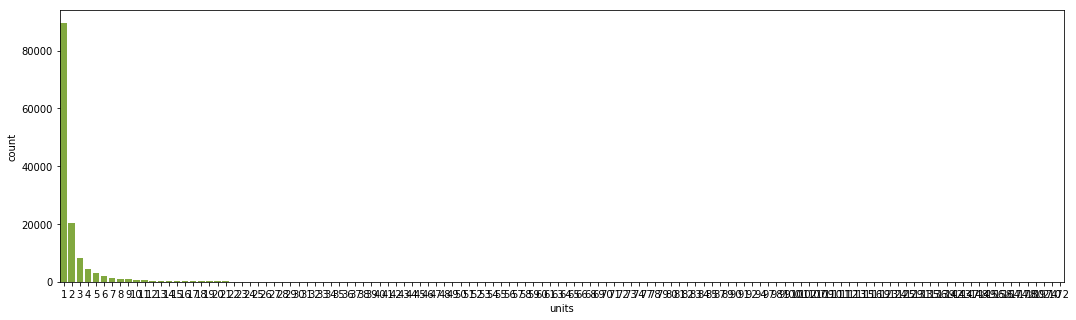

In [36]:
fig, ax = plt.subplots(figsize=(18, 5))
s1 = sns.countplot(x='units', data=train, ax=ax, color=plot_color)


Zbadajmy ile jest dni, w których zostały zakupione poszczególne produkty

In [38]:
selling_date_counts = train.groupby(by=('pid', 'size')).count().sort_values(by='units', ascending=False)
print(selling_date_counts)


                   date  units
pid   size                    
12985 L             123    123
12918 L             122    122
10447 M             122    122
      L             121    121
19288 L             121    121
18105 M             119    119
      L             119    119
15845 M             117    117
20709 L ( 42-46 )   116    116
22144 L ( 42-46 )   115    115
...                 ...    ...
17139 44              1      1
      44,5            1      1
17141 44,5            1      1
17147 2 ( 37-39 )     1      1
      4 ( 43-45 )     1      1
17153 S               1      1
17161 44,5            1      1
17162 42              1      1
      42,5            1      1
16348 45,5            1      1

[12815 rows x 2 columns]


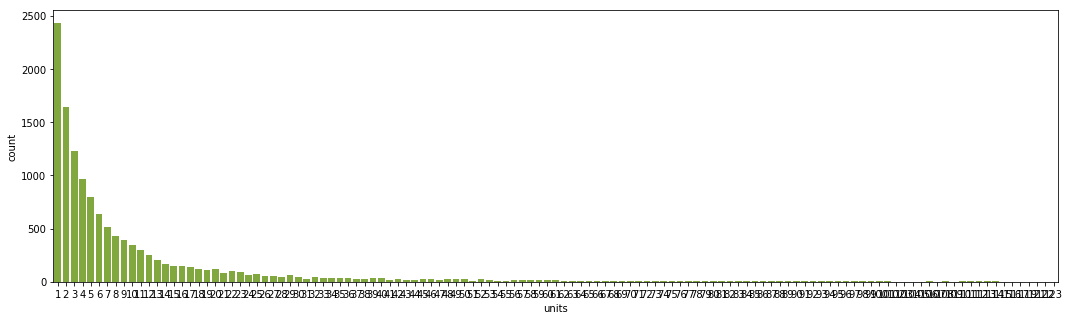

In [39]:
fig, ax = plt.subplots(figsize=(18, 5))
s1 = sns.countplot(x='units', data=selling_date_counts, ax=ax, color=plot_color)


Zbadajmy ile sztuk poszczególnych produktów zostało sprzedanych w całym okresie

In [40]:
sold_amount = train.groupby(by=('pid', 'size')).sum().sort_values(by='units', ascending=False)
print(sold_amount)


                   units
pid   size              
12985 L             2979
15845 M             2643
      L             2411
16818 L             1819
18105 M             1694
12988 4 ( 43-45 )   1562
19288 M             1439
18105 L             1427
18453 L             1388
10447 L             1358
...                  ...
17141 44,5             1
17147 2 ( 37-39 )      1
      4 ( 43-45 )      1
17153 S                1
17161 44,5             1
17162 42               1
      42,5             1
17179 S ( 34/36 )      1
17181 38               1
16348 45,5             1

[12815 rows x 1 columns]


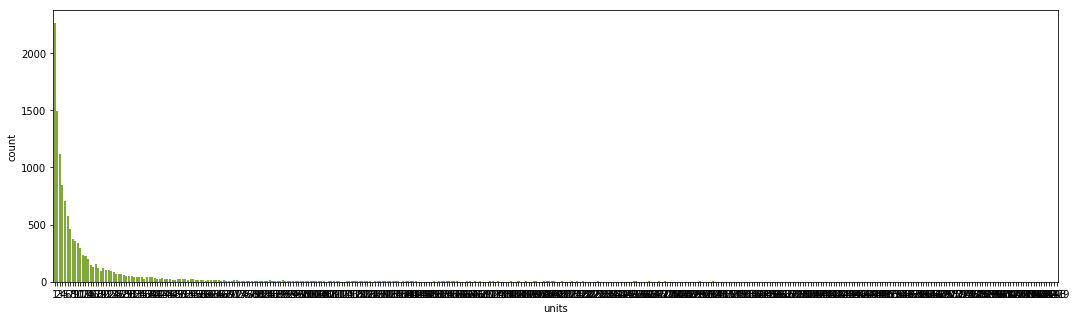

In [42]:
fig, ax = plt.subplots(figsize=(18, 5))
s1 = sns.countplot(x='units', data=sold_amount, ax=ax, color=plot_color)


Zbadajmy też jaka była średnia liczba sprzedanych unitów dla każdego produktu (nie średnio na każdy dzień ale w tych dniach w których wystąpiła sprzedaż produktu)

In [44]:
mean_amount = train.groupby(by=('pid', 'size')).mean().sort_values(by='units', ascending=False)
print(mean_amount)


                      units
pid   size                 
12596 S              50.000
15267 S              50.000
12985 L              24.220
12938 L              23.000
20141 4 ( 43-46 )    23.000
15845 M              22.590
      L              21.149
15670 S ( 34-38 )    17.333
17493 XL ( 158-170 ) 16.000
16818 L              15.956
...                     ...
15603 39 1/3          1.000
15602 140             1.000
15601 41 1/3          1.000
15595 43 1/3          1.000
      40 2/3          1.000
15593 140             1.000
      128             1.000
15590 46 2/3          1.000
      44              1.000
16348 45,5            1.000

[12815 rows x 1 columns]


Zbadajmy jeszcze jak w ogóle rozkładała się sprzedaż w czasie 

In [45]:
sales_over_time = train.loc[:, ('date', 'units')].groupby(
    by='date').sum()  # .sort_values(by = 'units', ascending = False)
print(mean_amount)


                      units
pid   size                 
12596 S              50.000
15267 S              50.000
12985 L              24.220
12938 L              23.000
20141 4 ( 43-46 )    23.000
15845 M              22.590
      L              21.149
15670 S ( 34-38 )    17.333
17493 XL ( 158-170 ) 16.000
16818 L              15.956
...                     ...
15603 39 1/3          1.000
15602 140             1.000
15601 41 1/3          1.000
15595 43 1/3          1.000
      40 2/3          1.000
15593 140             1.000
      128             1.000
15590 46 2/3          1.000
      44              1.000
16348 45,5            1.000

[12815 rows x 1 columns]


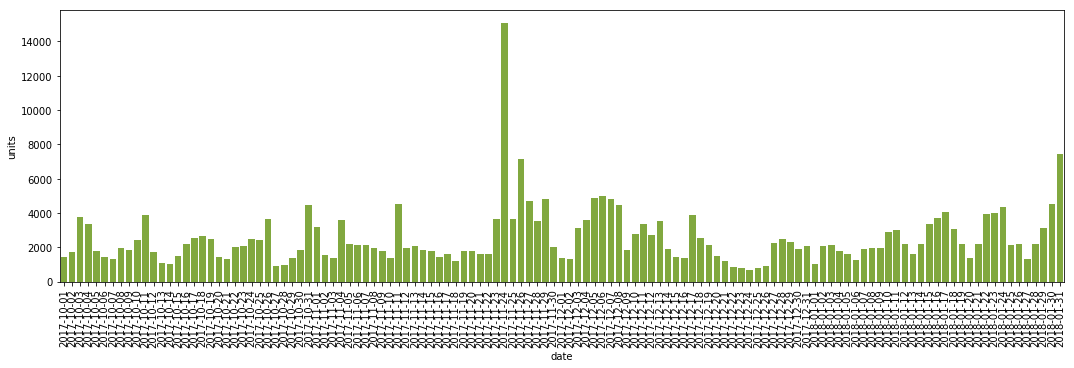

In [46]:
fig, ax = plt.subplots(figsize=(18, 5))
s1 = sns.barplot(x=sales_over_time.index, y=sales_over_time.units, ax=ax, color=plot_color)
l1 = s1.set_xticklabels(labels=s1.get_xticklabels(), rotation=90)  # had to be assigned to a variable to suppres output


Zbadajmy jak na sprzedaż ma wpływ dzień tygodnia 

In [47]:
train['weekday'] = pd.to_datetime(train['date'])
train['weekday'] = train['weekday'].dt.weekday  # 0 is monday, 6 is sunday


In [48]:
weekday_sales = train.loc[:, ('weekday', 'units')].groupby(
    by='weekday').sum()  # .sort_values(by = 'units', ascending = False)
print(weekday_sales)


         units
weekday       
0        44053
1        51631
2        58820
3        40407
4        43055
5        30371
6        42334


[[Text(0,0,'Monday'),
  Text(0,0,'Tuesday'),
  Text(0,0,'Wednesday'),
  Text(0,0,'Thursday'),
  Text(0,0,'Friday'),
  Text(0,0,'Saturday'),
  Text(0,0,'Sunday')]]

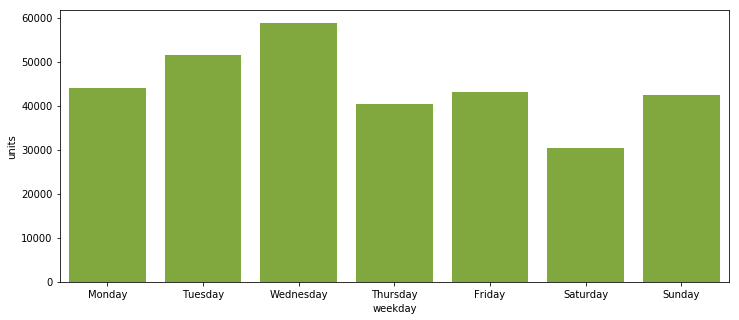

In [49]:
fig, ax = plt.subplots(figsize=(12, 5))
s1 = sns.barplot(x=weekday_sales.index, y=weekday_sales.units, ax=ax, color=plot_color)
s1.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


# Explore merged set

set obtained with preprocess.py

In [3]:
full = pd.read_csv("C:\\DMC_2018\\preprocessed_data\\full.csv", sep='|')

In [11]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577352 entries, 0 to 1577351
Data columns (total 13 columns):
Unnamed: 0      1577352 non-null int64
date            1577352 non-null object
pid             1577352 non-null int64
size            1577352 non-null object
units           135117 non-null float64
color           1577352 non-null object
brand           1577352 non-null object
rrp             1577352 non-null float64
mainCategory    1577352 non-null int64
category        1577352 non-null int64
subCategory     1577352 non-null int64
stock           1577352 non-null int64
releaseDate     1577352 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 156.4+ MB


In [12]:
full.isnull().sum()

Unnamed: 0            0
date                  0
pid                   0
size                  0
units           1442235
color                 0
brand                 0
rrp                   0
mainCategory          0
category              0
subCategory           0
stock                 0
releaseDate           0
dtype: int64

In [4]:
full.head(15)

,date,pid,size,units,color,brand,rrp,mainCategory,category,subCategory,stock,releaseDate
0,2017-10-01,10000,XL ( 158-170 ),0,gruen,Nike,25.330,1,7,25,1,2017-10-01
1,2017-10-01,10001,L,0,schwarz,Jako,38.030,1,7,16,1,2017-10-01
2,2017-10-01,10003,3 (35-38 ),0,weiss,Jako,12.630,1,7,13,1,2017-10-01
3,2017-10-01,10003,4 ( 39-42 ),0,weiss,Jako,12.630,1,7,13,1,2017-10-01
4,2017-10-01,10003,5 ( 43-46 ),0,weiss,Jako,12.630,1,7,13,1,2017-10-01
5,2017-10-01,10006,XL,0,blau,Under Armour,57.080,15,24,0,1,2017-10-01
6,2017-10-01,10008,XL,0,blau,PUMA,25.330,1,7,8,12,2017-10-01
7,2017-10-01,10013,L,0,schwarz,adidas,69.780,1,7,16,1,2017-10-27
8,2017-10-01,10013,M,0,schwarz,adidas,69.780,1,7,16,1,2017-10-27
9,2017-10-01,10013,S,0,schwarz,adidas,69.780,1,7,16,1,2017-10-27


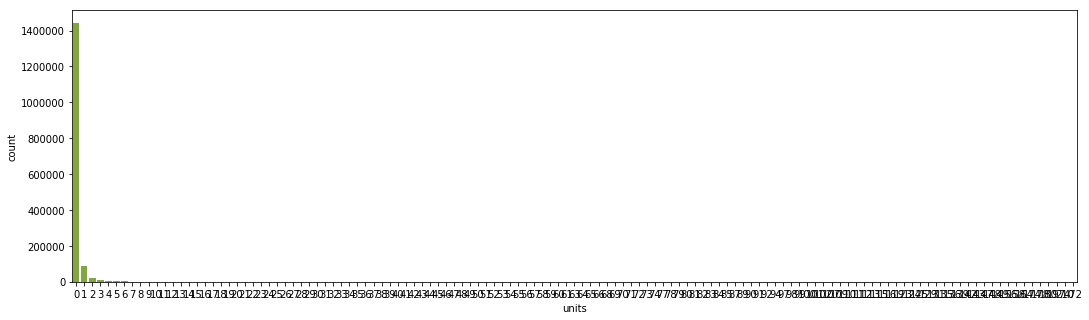

In [5]:
fig, ax = plt.subplots(figsize=(18, 5))
s1 = sns.countplot(x='units', data=full, ax=ax, color=plot_color)